---
title: "Dataviz (Informe)"
author: "Mariana Franco & Samuel Bermúdez"
date: "2025-02-27"
output: html_document
editor_options: 
  chunk_output_type: console
---

# *Etapa 1: Carga y Limpieza*

## 1. Cargar librerias.



In [105]:
# Importación de librerías equivalentes en Python
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import janitor
from plotnine import *
from scipy import stats

# Configuración opcional para visualización
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Para mostrar todas las columnas en Pandas
pd.set_option('display.max_columns', None)

# Función equivalente a `%>%` en R usando .pipe()
def pipe(df, *funcs):
    for func in funcs:
        df = func(df)
    return df



## 2. Importar la base de datos y visualizarlos.



In [126]:
datos = pd.read_csv("base_de_datos.csv")


## 3. Resumen de los datos y visualización de Encabezados.



In [107]:
print(datos.info())
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            6498 non-null   object 
 1   Project Name                                              6498 non-null   object 
 2   Document Type                                             6498 non-null   object 
 3   Project Number                                            6498 non-null   int64  
 4   Project Url                                               6498 non-null   object 
 5   Product Line                                              6248 non-null   object 
 6   Company Name                                              6475 non-null   object 
 7   Country                                                   6498 non-null   object 
 8   IFC Country Code  

In [108]:
print(datos.describe())

       Project Number  IFC investment for Risk Management(Million - USD)  \
count     6498.000000                                         189.000000   
mean     34009.326254                                           5.597619   
std      44318.334749                                          11.971558   
min       3402.000000                                           0.000000   
25%      24128.750000                                           1.000000   
50%      31565.000000                                           2.200000   
75%      41269.250000                                           5.000000   
max     574447.000000                                         100.000000   

       IFC investment for Guarantee(Million - USD)  \
count                                   358.000000   
mean                                    105.573073   
std                                     181.655381   
min                                       0.000000   
25%                                       7.4

In [109]:
print(datos.shape)

(6498, 24)


In [110]:
print(datos.head())

  Date Disclosed                      Project Name  \
0     03/30/2023                      BOP EU Tchad   
1     12/04/2014                 Millicom Tchad SA   
2     04/30/2013                       Chad Clinic   
3     04/19/2010  Aubaine Graphic SA Printing Chad   
4     03/04/2010                      Ecobank Chad   

                                       Document Type  Project Number  \
0  Summary of Investment Information (AIP Policy ...           45483   
1  Summary of Investment Information (AIP Policy ...           34297   
2  Summary of Investment Information (AIP Policy ...           32607   
3  Summary of Proposed Investment (Disclosure Pol...           29084   
4  Summary of Proposed Investment (Disclosure Pol...           29317   

                                         Project Url Product Line  \
0  https://disclosures.ifc.org/project-detail/SII...         Loan   
1  https://disclosures.ifc.org/project-detail/SII...         Loan   
2  https://disclosures.ifc.org/proj


## 4. Visualización y limpieza de nombres de las variables.

### 4.1. Nombres de las variables originales



In [123]:
datos.columns


Index(['date_disclosed', 'project_name', 'document_type', 'project_number',
       'project_url', 'product_line', 'company_name', 'country',
       'ifc_country_code', 'industry', 'environmental_category', 'department',
       'status', 'projected_board_date', 'ifc_approval_date',
       'ifc_signed_date', 'ifc_invested_date',
       'ifc_investment_for_risk_management(million_-_usd)',
       'ifc_investment_for_guarantee(million_-_usd)',
       'ifc_investment_for_loan(million_-_usd)',
       'ifc_investment_for_equity(million_-_usd)',
       'total_ifc_investment_as_approved_by_board(million_-_usd)',
       'wb_country_code', 'as_of_date'],
      dtype='object')


### 4.2. Traducción de nombres



In [128]:
columnas_traducidas = {
    "Date Disclosed": "fecha_divulgada",
    "Project Name": "nombre_proyecto",
    "Document Type": "tipo_documento",
    "Project Number": "numero_proyecto",
    "Project Url": "url_proyecto",
    "Product Line": "linea_producto",
    "Company Name": "nombre_empresa",
    "Country": "pais",
    "IFC Country Code": "codigo_pais_ifc",
    "Industry": "industria",
    "Environmental Category": "categoria_ambiental",
    "Department": "departamento",
    "Status": "estado",
    "Projected Board Date": "fecha_estimada_junta",
    "IFC Approval Date": "fecha_aprobacion_ifc",
    "IFC Signed Date": "fecha_firma_ifc",
    "IFC Invested Date": "fecha_inversion_ifc",
    "IFC investment for Risk Management(Million - USD)": "inversion_ifc_gestion_riesgo_millones_usd",
    "IFC investment for Guarantee(Million - USD)": "inversion_ifc_garantia_millones_usd",
    "IFC investment for Loan(Million - USD)": "inversion_ifc_prestamo_millones_usd",
    "IFC investment for Equity(Million - USD)": "inversion_ifc_capital_millones_usd",
    "Total IFC investment as approved by Board(Million - USD)": "total_inversion_ifc_aprobada_junta_millones_usd",
    "WB Country Code": "codigo_pais_bm",
    "As of Date": "fecha_corte"
}

datos.rename(columns=columnas_traducidas, inplace=True)
    

In [129]:
datos.columns

Index(['fecha_divulgada', 'nombre_proyecto', 'tipo_documento',
       'numero_proyecto', 'url_proyecto', 'linea_producto', 'nombre_empresa',
       'pais', 'codigo_pais_ifc', 'industria', 'categoria_ambiental',
       'departamento', 'estado', 'fecha_estimada_junta',
       'fecha_aprobacion_ifc', 'fecha_firma_ifc', 'fecha_inversion_ifc',
       'inversion_ifc_gestion_riesgo_millones_usd',
       'inversion_ifc_garantia_millones_usd',
       'inversion_ifc_prestamo_millones_usd',
       'inversion_ifc_capital_millones_usd',
       'total_inversion_ifc_aprobada_junta_millones_usd', 'codigo_pais_bm',
       'fecha_corte'],
      dtype='object')


## 5. Gráfico de datos faltantes.

### 5.1. Datos faltantes originales



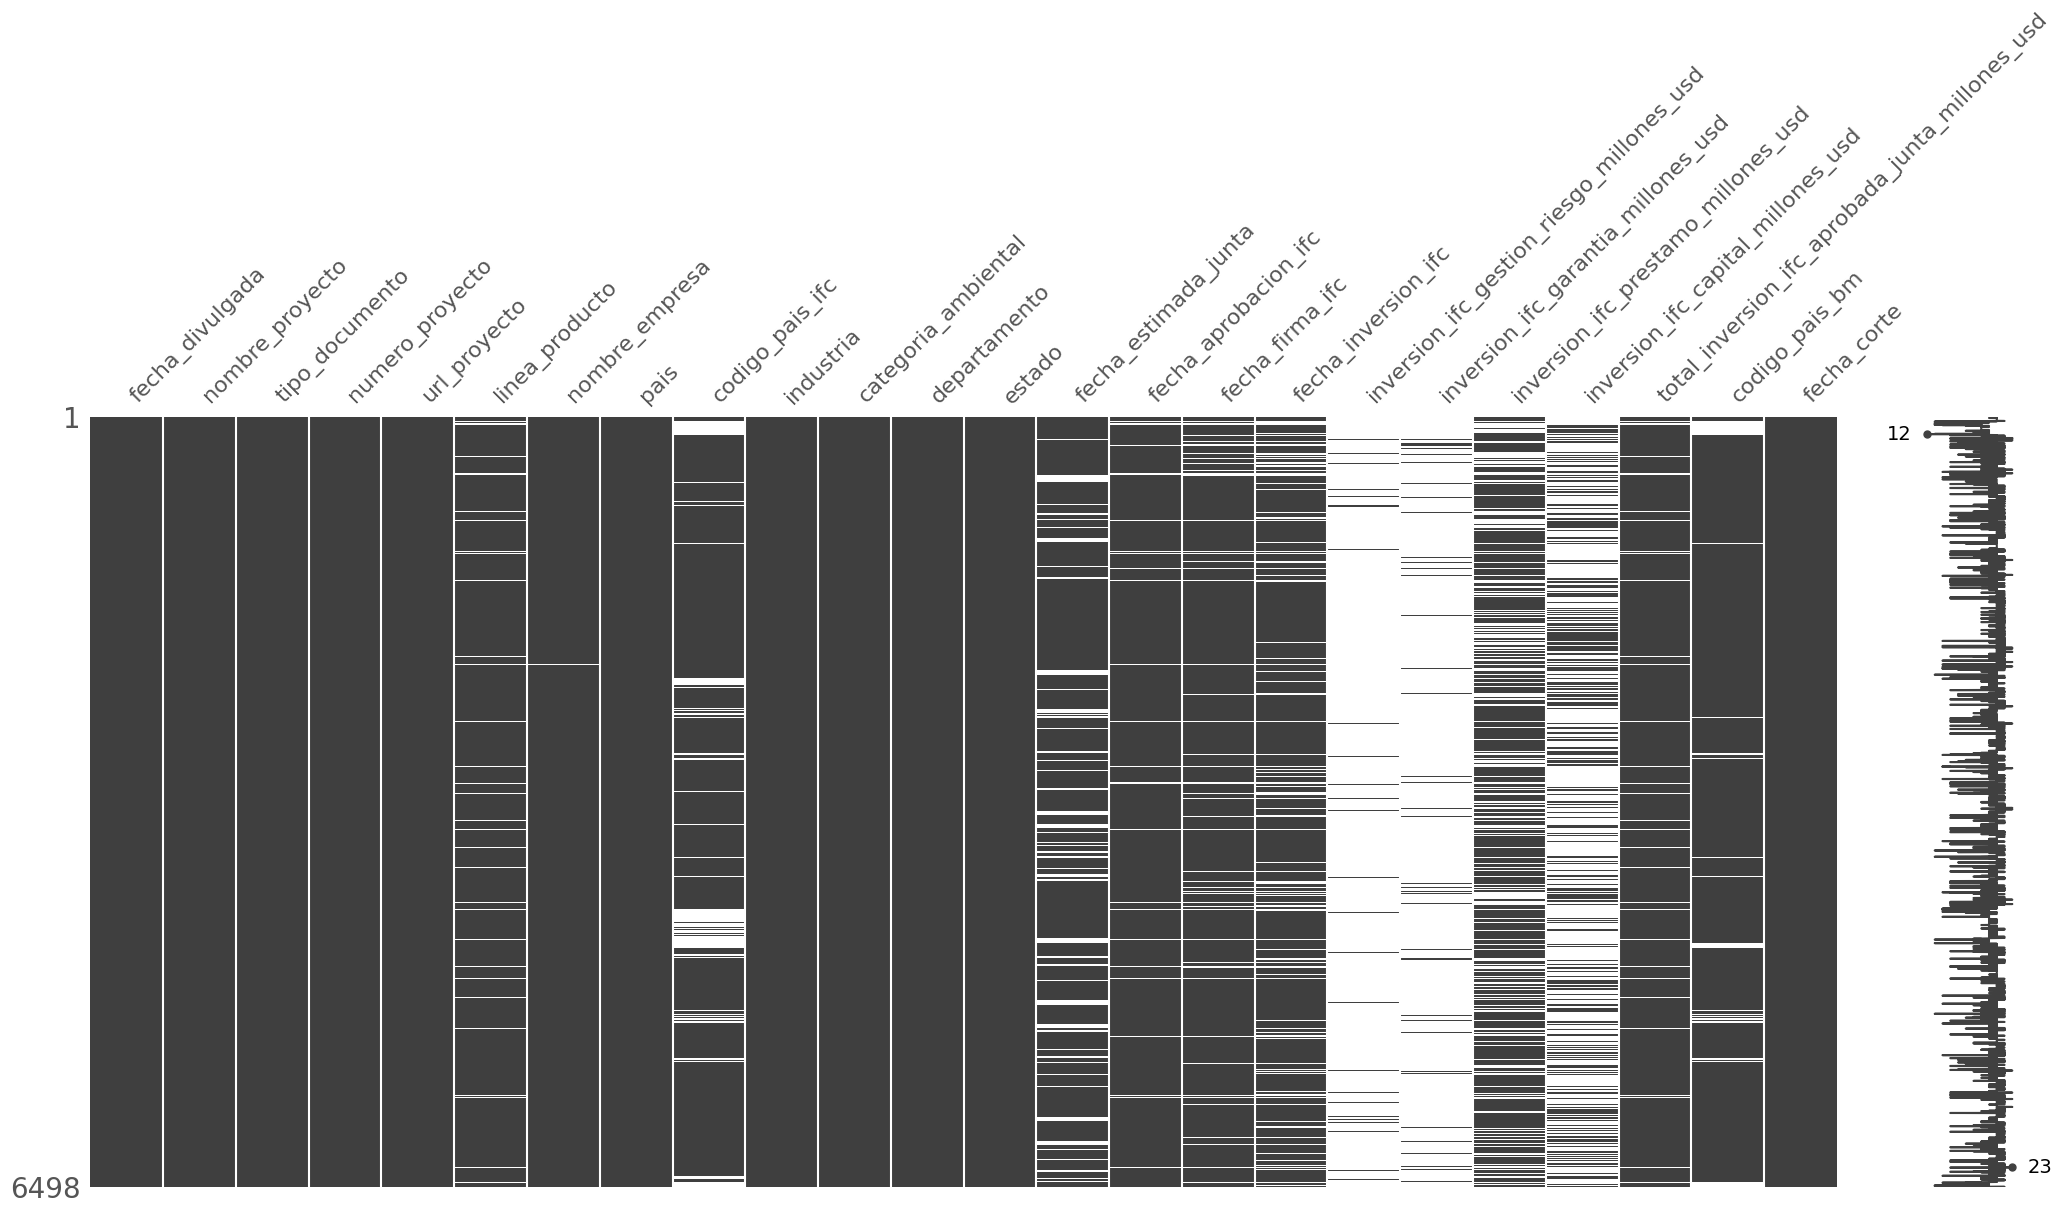

In [130]:
msno.matrix(datos)
plt.show()


### 5.2. Porcentaje de valores NA por variable de mayor a menor



In [131]:
na_percent_sorted = (datos.isna().sum() / len(datos) * 100).sort_values(ascending=False)

# Mostrar los resultados
print(na_percent_sorted)

inversion_ifc_gestion_riesgo_millones_usd          97.091413
inversion_ifc_garantia_millones_usd                94.490612
inversion_ifc_capital_millones_usd                 65.404740
inversion_ifc_prestamo_millones_usd                28.747307
fecha_estimada_junta                               13.650354
fecha_inversion_ifc                                12.788550
codigo_pais_ifc                                    12.080640
fecha_firma_ifc                                     6.786704
codigo_pais_bm                                      4.970760
linea_producto                                      3.847338
total_inversion_ifc_aprobada_junta_millones_usd     3.831948
fecha_aprobacion_ifc                                3.247153
nombre_empresa                                      0.353955
fecha_divulgada                                     0.000000
estado                                              0.000000
nombre_proyecto                                     0.000000
departamento            


*Se puede observar que existen grandes cantidades de **datos faltantes** y tenemos que proceder a tratarlos, antes de eso haremos una limpieza para poder realizar la limpieza.*

## 6. Revisión y eliminación de duplicados

### 6.1. Revisión de Duplicados



In [132]:

duplicados = datos.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")



Filas duplicadas: 4



*Hay 4 lineas duplicadas.*

### 6.2. Eliminación de duplicados



In [133]:
datos_limpios = datos.drop_duplicates()
print(f"Filas duplicadas después de limpieza: {datos_limpios.duplicated().sum()}")
    

Filas duplicadas después de limpieza: 0



### 6.3. Eliminación de variables NO útiles



In [134]:

datos_limpios = datos_limpios.drop(columns=["fecha_corte", "fecha_estimada_junta", "fecha_aprobacion_ifc", "fecha_firma_ifc", "fecha_inversion_ifc"])
    


# *Etapa 2: Manejo de NAs*

*Reemplazamos los NAs por 0 en variables que se encuentran en términos de dinero.*



In [135]:
datos_limpios.columns

Index(['fecha_divulgada', 'nombre_proyecto', 'tipo_documento',
       'numero_proyecto', 'url_proyecto', 'linea_producto', 'nombre_empresa',
       'pais', 'codigo_pais_ifc', 'industria', 'categoria_ambiental',
       'departamento', 'estado', 'inversion_ifc_gestion_riesgo_millones_usd',
       'inversion_ifc_garantia_millones_usd',
       'inversion_ifc_prestamo_millones_usd',
       'inversion_ifc_capital_millones_usd',
       'total_inversion_ifc_aprobada_junta_millones_usd', 'codigo_pais_bm'],
      dtype='object')

In [136]:

columnas_monetarias = [
    "inversion_ifc_gestion_riesgo_millones_usd",
    "inversion_ifc_garantia_millones_usd",
    "inversion_ifc_prestamo_millones_usd",
    "inversion_ifc_capital_millones_usd",
    "total_inversion_ifc_aprobada_junta_millones_usd"
]
datos_limpios[columnas_monetarias] = datos_limpios[columnas_monetarias].fillna(0)


*Convertimos el formato de fecha y de los identificadores.*



In [137]:

datos_limpios[datos_limpios.columns[datos_limpios.columns.str.contains("fecha")]] = datos_limpios[datos_limpios.columns[datos_limpios.columns.str.contains("fecha")]].apply(pd.to_datetime, errors='coerce')
datos_limpios[datos_limpios.columns[datos_limpios.columns.str.contains("codigo") | datos_limpios.columns.str.contains("numero")]] = datos_limpios[datos_limpios.columns[datos_limpios.columns.str.contains("codigo") | datos_limpios.columns.str.contains("numero")]].astype(str)
    


*Para las variables que no tienen NAs no se les reliza imputación. Y las variables que son identificadoras no se pueden imputar.*


## Visualización Final de Datos Faltantes

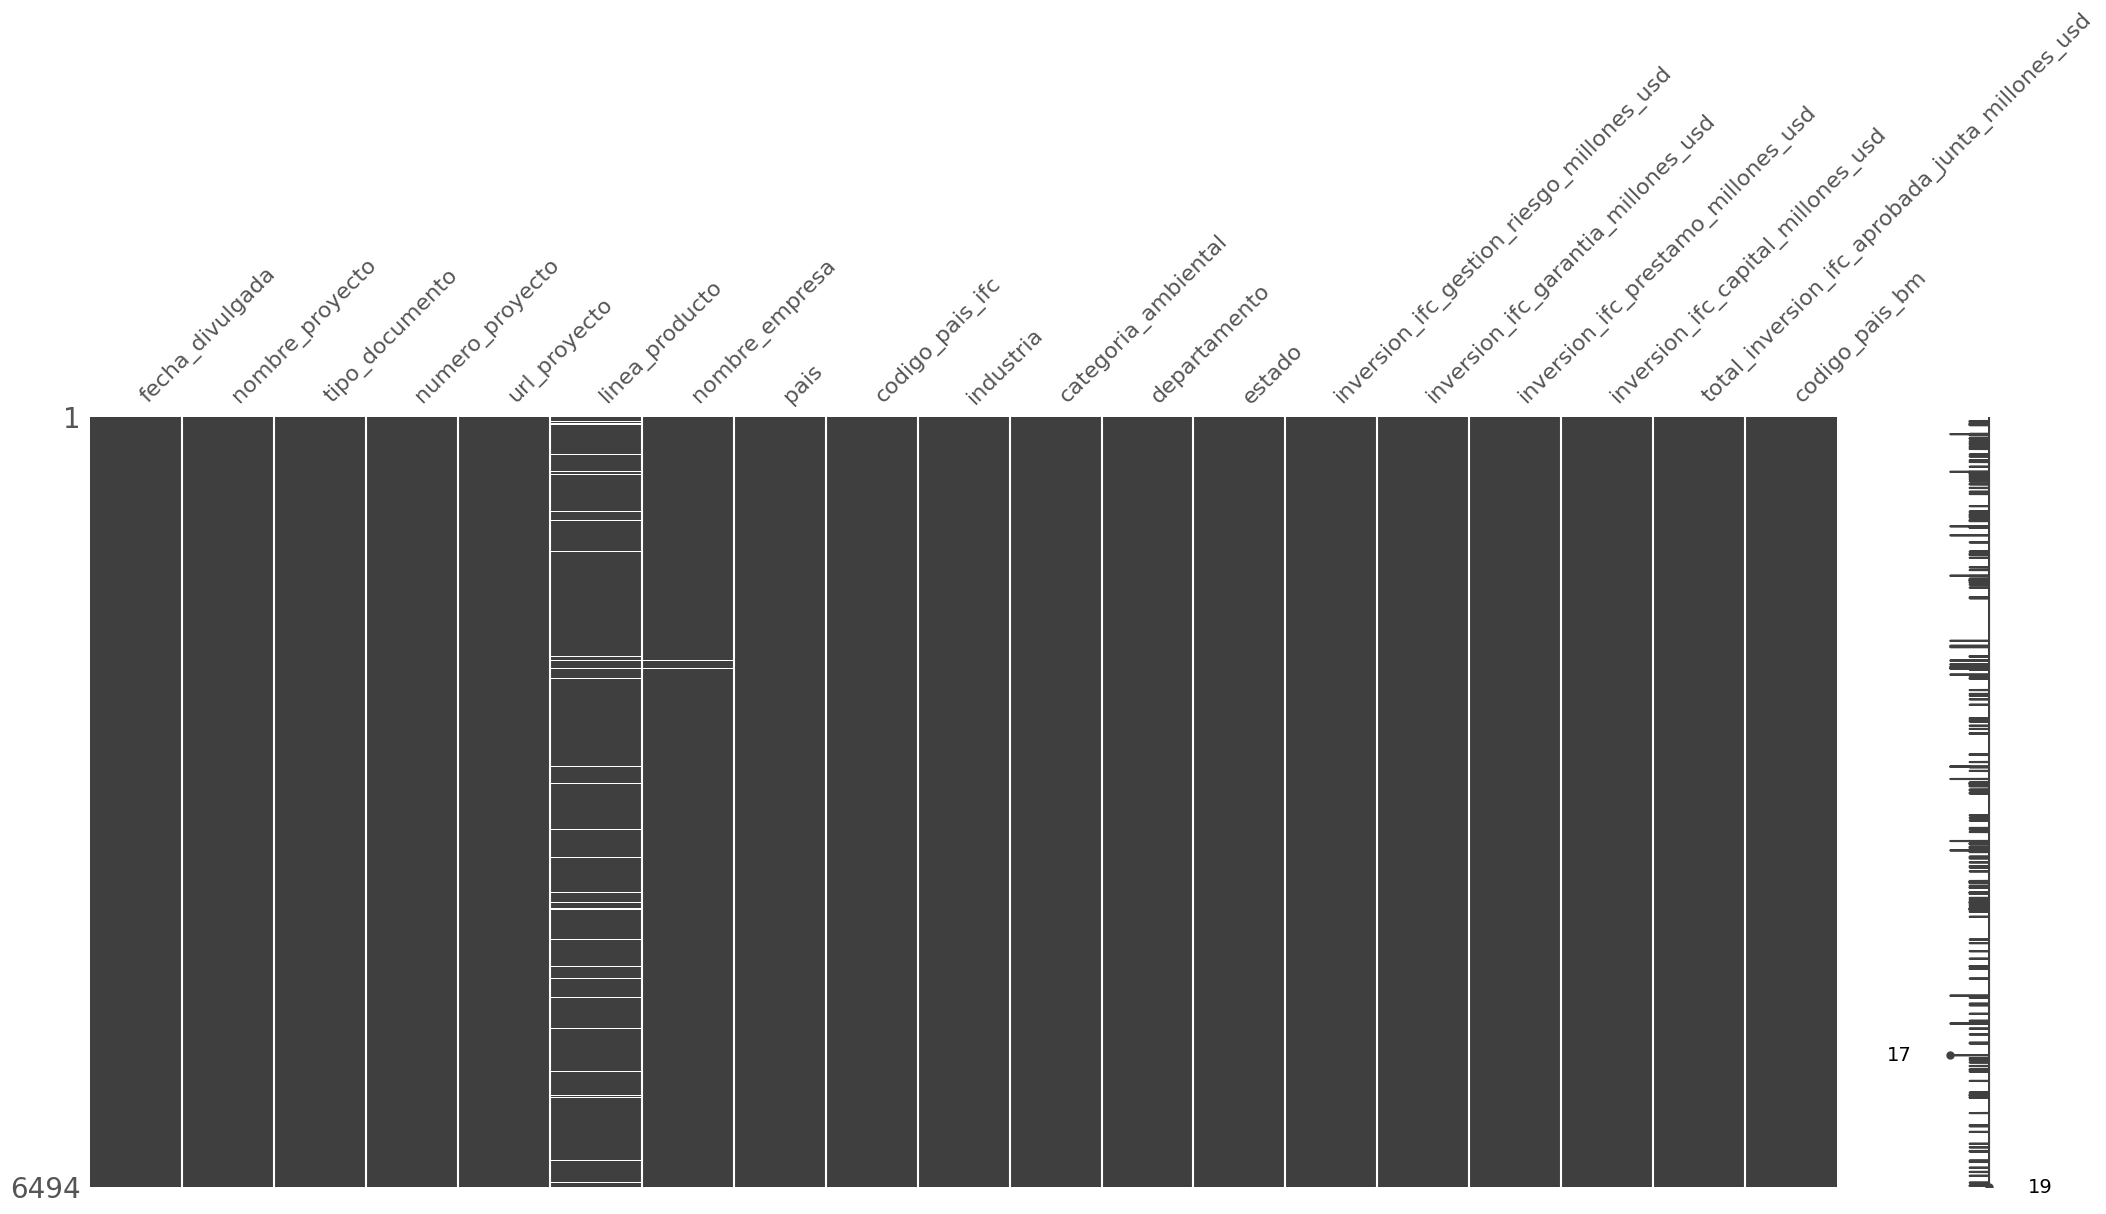

In [138]:

msno.matrix(datos_limpios)
plt.show()
    

## Verificación Final

In [139]:

print(datos_limpios.info())

    

<class 'pandas.core.frame.DataFrame'>
Index: 6494 entries, 0 to 6497
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   fecha_divulgada                                  6494 non-null   datetime64[ns]
 1   nombre_proyecto                                  6494 non-null   object        
 2   tipo_documento                                   6494 non-null   object        
 3   numero_proyecto                                  6494 non-null   object        
 4   url_proyecto                                     6494 non-null   object        
 5   linea_producto                                   6245 non-null   object        
 6   nombre_empresa                                   6471 non-null   object        
 7   pais                                             6494 non-null   object        
 8   codigo_pais_ifc                            

In [140]:
print(datos_limpios.isnull().sum().sort_values(ascending=False))

linea_producto                                     249
nombre_empresa                                      23
fecha_divulgada                                      0
departamento                                         0
total_inversion_ifc_aprobada_junta_millones_usd      0
inversion_ifc_capital_millones_usd                   0
inversion_ifc_prestamo_millones_usd                  0
inversion_ifc_garantia_millones_usd                  0
inversion_ifc_gestion_riesgo_millones_usd            0
estado                                               0
industria                                            0
categoria_ambiental                                  0
nombre_proyecto                                      0
codigo_pais_ifc                                      0
pais                                                 0
url_proyecto                                         0
numero_proyecto                                      0
tipo_documento                                       0
codigo_pai


# Etapa 3: Análisis

## 1. Analisis Univariado

### 1.1. Distribución de la inversión IFC aprobada

Este histograma muestra la distribución de la inversión total aprobada por la junta de la IFC (Corporación Financiera Internacional) en millones de USD. Algunas observaciones clave:



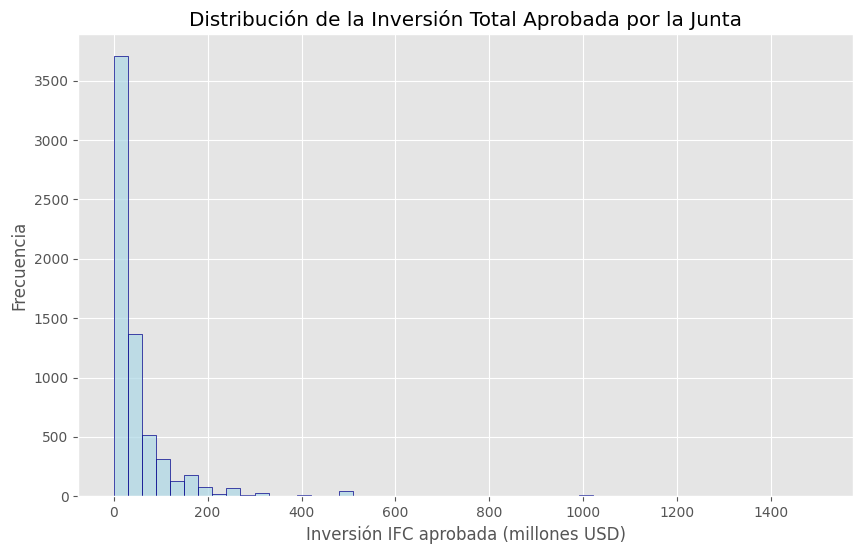

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(datos_limpios['total_inversion_ifc_aprobada_junta_millones_usd'], bins=50, color="lightblue", edgecolor="darkblue", alpha=0.7)
plt.title("Distribución de la Inversión Total Aprobada por la Junta")
plt.xlabel("Inversión IFC aprobada (millones USD)")
plt.ylabel("Frecuencia")
plt.show()


***Sesgo a la derecha:** La mayoría de las inversiones son pequeñas, concentrándose en valores bajos. A medida que la inversión aumenta, la frecuencia disminuye rápidamente.*

***Valores extremos:** Existen algunos valores significativamente grandes (inversiones superiores a 500 millones USD), pero son poco frecuentes.*

***Distribución altamente asimétrica:** La gran mayoría de los datos están en el rango de 0 a 100 millones USD.*

### 1.2. Proporción de proyectos por categoría ambiental

*Este gráfico de barras muestra la distribución de proyectos por categoría ambiental.*



C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\3551277636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



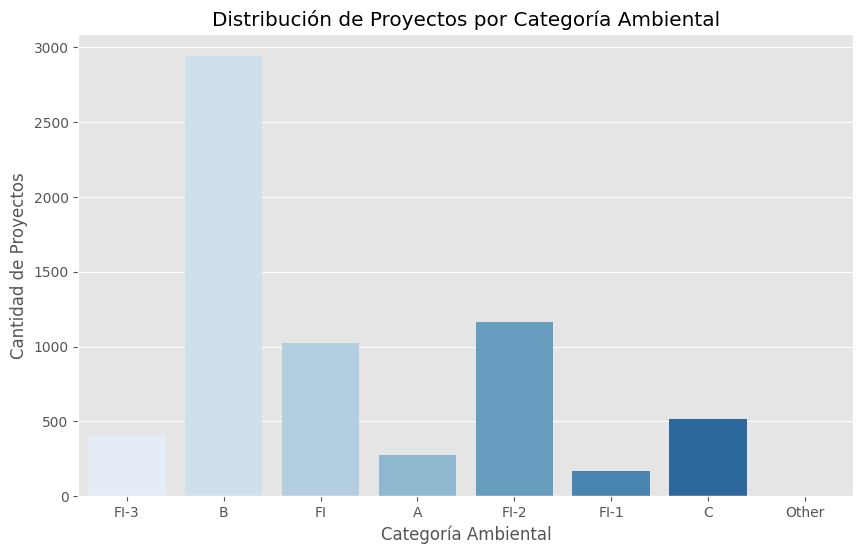

In [142]:
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_limpios, x="categoria_ambiental", palette="Blues")
plt.title("Distribución de Proyectos por Categoría Ambiental")
plt.xlabel("Categoría Ambiental")
plt.ylabel("Cantidad de Proyectos")
plt.show()


*La **categoría B** es la más común con aproximadamente 3000 proyectos, lo que indica que la mayoría de los proyectos tienen impactos ambientales moderados.*

*Las categorías **FI** y **FI-2** también tienen una cantidad significativa de proyectos, superando los 1000, lo que sugiere una alta actividad en proyectos financieros con riesgo ambiental.*

*Las categorías **A**, **FI-1** y **"Other"** tienen el menor número de proyectos, lo que podría indicar que los proyectos con alto impacto ambiental (categoría A) son menos frecuentes.*

### 1.3. Cantidad de proyectos por industria

*Este gráfico muestra la distribución de proyectos por industria.*



C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\2363999194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



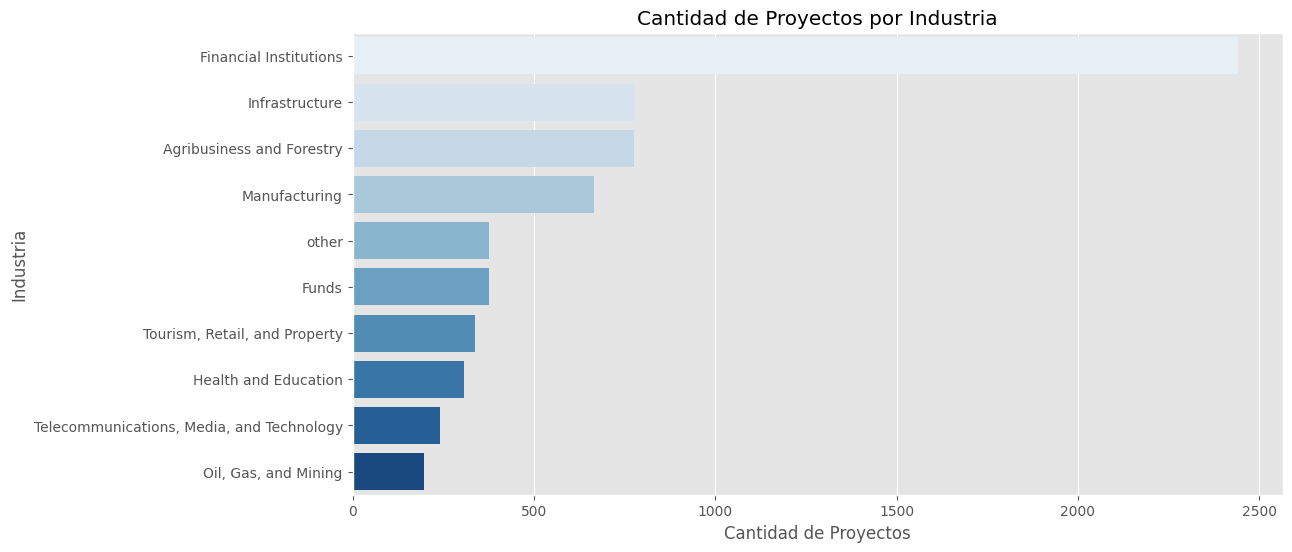

In [143]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datos_limpios, y="industria", palette="Blues", order=datos_limpios["industria"].value_counts().index)
plt.title("Cantidad de Proyectos por Industria")
plt.xlabel("Cantidad de Proyectos")
plt.ylabel("Industria")
plt.show()


*Las instituciones financieras lideran en cantidad de proyectos, con más de 2,500, lo que sugiere una **fuerte actividad en el sector financiero.** Las industrias de infraestructura y manufactura también tienen un número considerable de proyectos, superando los 1,000, lo que indica que estos sectores son relevantes en términos de inversión y desarrollo. El sector de agronegocios y silvicultura también tiene una participación significativa, aunque menor que las instituciones financieras. **Las industrias con menor cantidad de proyectos incluyen petróleo, gas y minería, telecomunicaciones y tecnología, y turismo, comercio minorista y propiedad.***

### 1.4. Cantidad de proyectos por país

*Este gráfico muestra los 10 países con más proyectos.*



C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\2280416619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



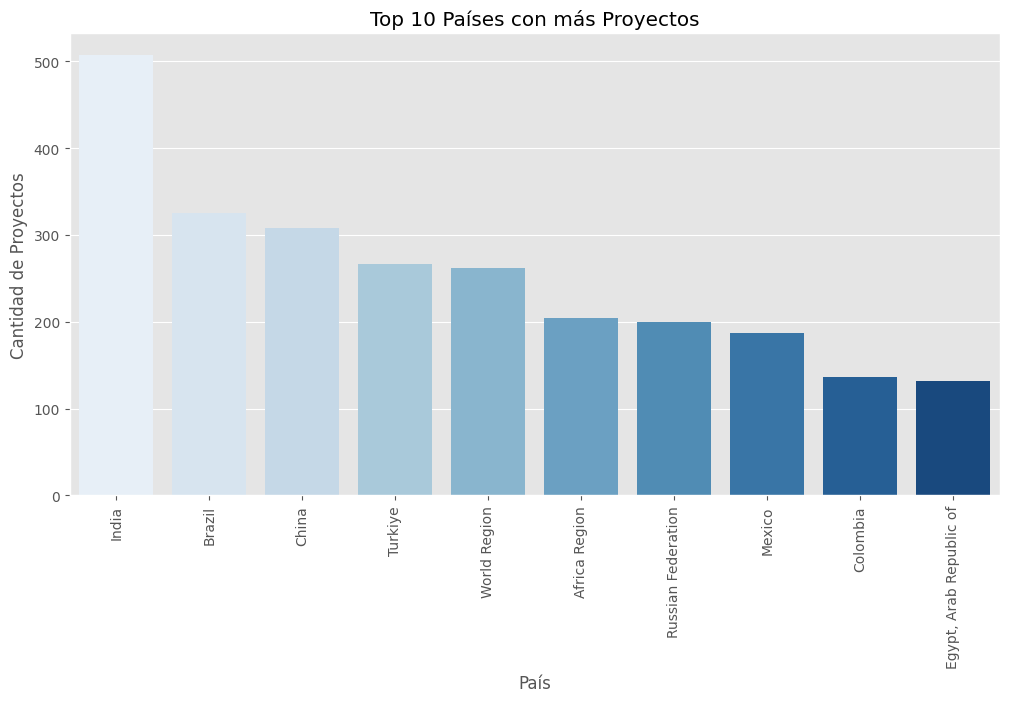

In [144]:
top_paises = datos_limpios["pais"].value_counts().nlargest(10).index
datos_top_paises = datos_limpios[datos_limpios["pais"].isin(top_paises)]

plt.figure(figsize=(12, 6))
sns.countplot(data=datos_top_paises, x="pais", palette="Blues", order=top_paises)
plt.title("Top 10 Países con más Proyectos")
plt.xlabel("País")
plt.ylabel("Cantidad de Proyectos")
plt.xticks(rotation=90)
plt.show()


***India** lidera la lista con más de 500 proyectos, lo que indica una alta actividad en inversión o desarrollo en el país. **Brasil y China** le siguen con alrededor de 300 proyectos cada uno. Turquía y la categoría "World Region" tienen un número similar de proyectos, algo menor que China. **Colombia** aparece en la lista, aunque con un número de proyectos menor en comparación con países como India y Brasil. **Egipto** cierra el ranking con la menor cantidad dentro del top 10.*

### 1.5. Estado de los proyectos

*Este gráfico muestra la distribución del estado de los proyectos.*



C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\3254496521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



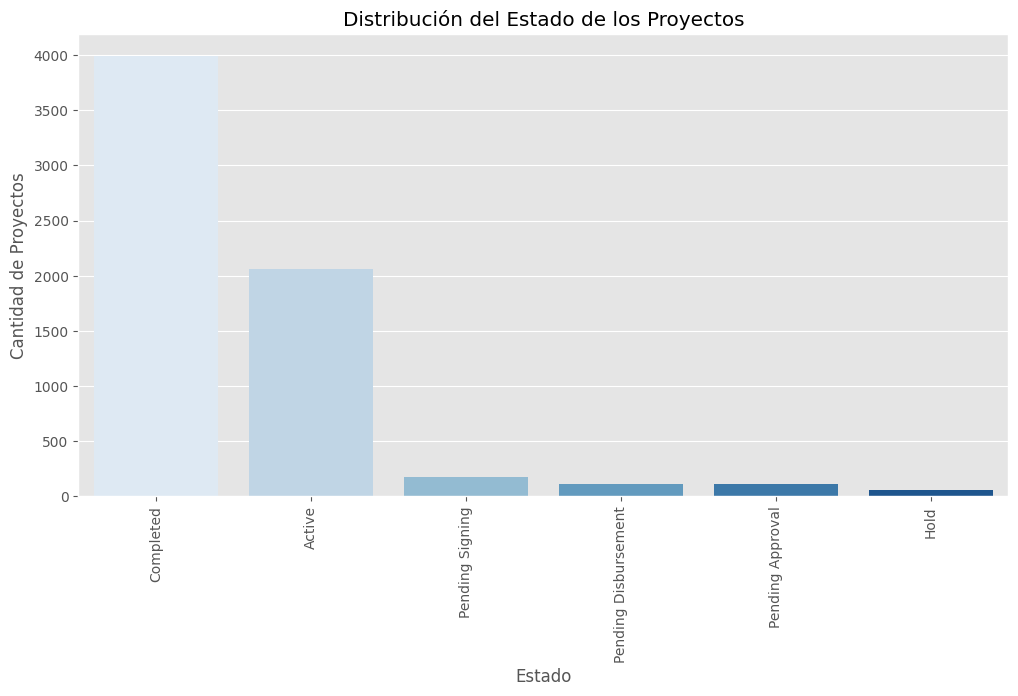

In [145]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datos_limpios, x="estado", palette="Blues", order=datos_limpios["estado"].value_counts().index)
plt.title("Distribución del Estado de los Proyectos")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Proyectos")
plt.xticks(rotation=90)
plt.show()



*La mayoría de los proyectos están completados (\~4000), lo que indica un alto nivel de finalización. Los proyectos activos también son significativos (\~2000), mostrando que todavía hay una cantidad considerable en ejecución. Los estados "Hold", "Pending Approval", "Pending Disbursement" y "Pending Signing" tienen muy pocos proyectos, lo que sugiere que la mayoría de los proyectos avanzan sin grandes bloqueos.*

## 2. Analisis Bivariado

### 2.1. Industria vs. Inversión Total IFC



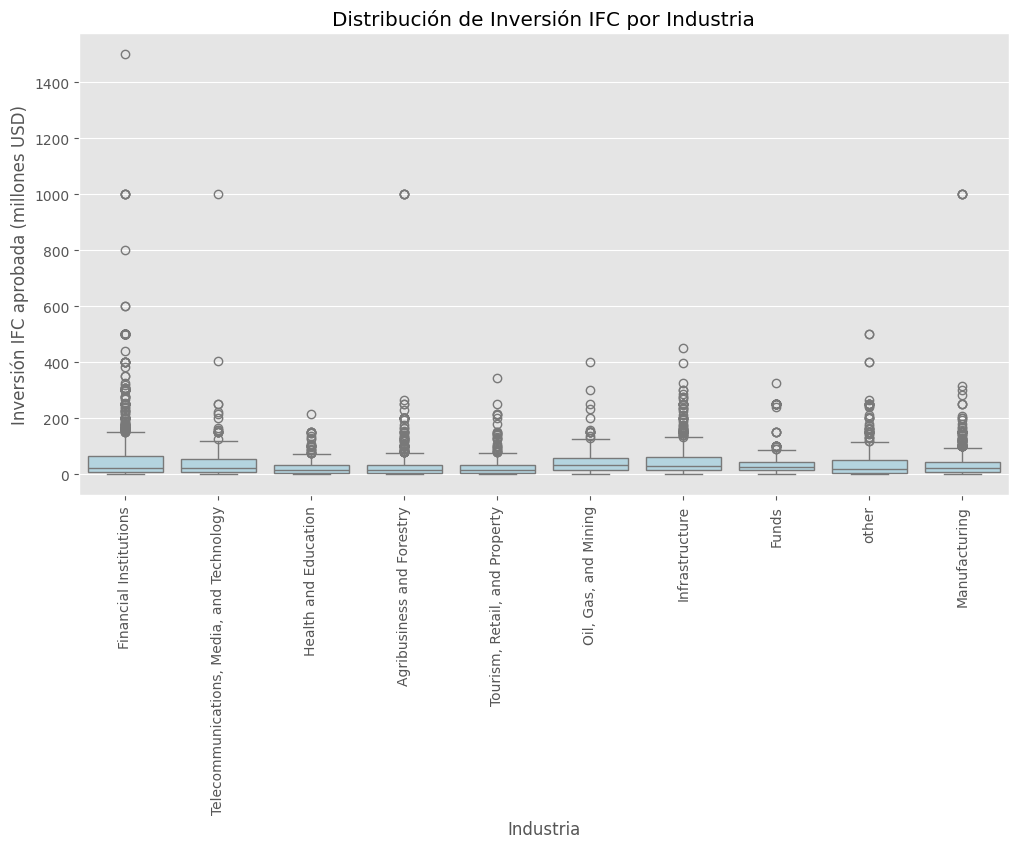

In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_limpios, x="industria", y="total_inversion_ifc_aprobada_junta_millones_usd", color="lightblue")
plt.xticks(rotation=90)
plt.title("Distribución de Inversión IFC por Industria")
plt.xlabel("Industria")
plt.ylabel("Inversión IFC aprobada (millones USD)")
plt.show()


*El gráfico muestra la distribución de la inversión aprobada por la IFC en distintas industrias. Se observa que la mayoría de las inversiones están en rangos bajos, pero hay valores atípicos significativos, especialmente en **Financial Institutions, Infrastructure y Manufacturing**, donde algunas inversiones superan los 1000 millones de USD. La mediana de inversión es baja en casi todas las industrias, indicando que solo unos pocos proyectos reciben montos muy altos.*

### 2.2. País vs. Inversión Total IFC



C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\4040151451.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



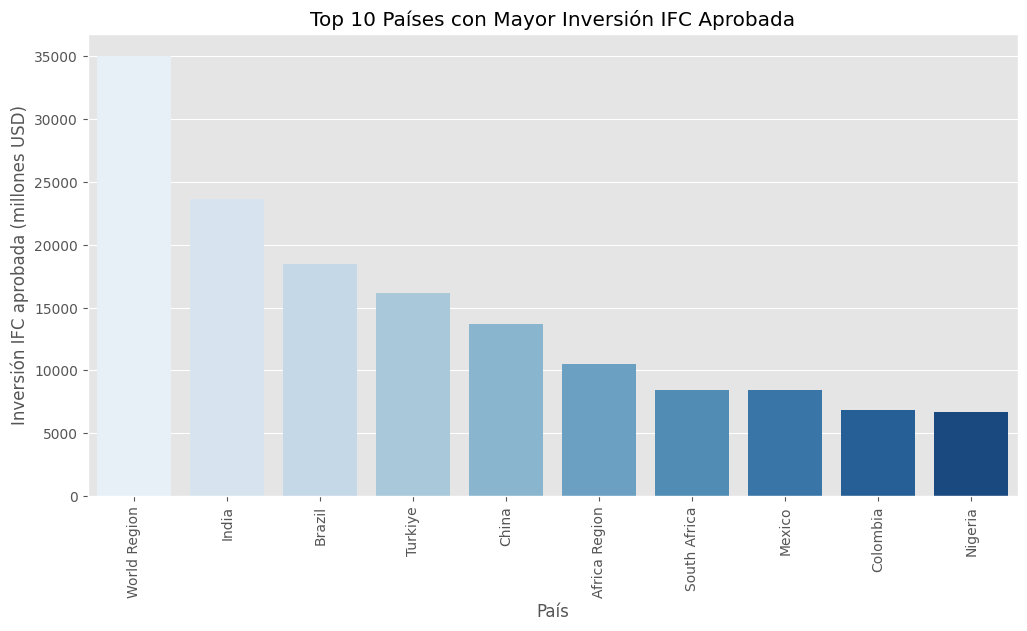

In [147]:
top_paises_inversion = datos_limpios.groupby("pais").agg(
    total_inversion_ifc_aprobada_junta_millones_usd=("total_inversion_ifc_aprobada_junta_millones_usd", "sum"),
    cantidad_proyectos=("pais", "count")
).nlargest(10, "total_inversion_ifc_aprobada_junta_millones_usd").reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_paises_inversion, x="pais", y="total_inversion_ifc_aprobada_junta_millones_usd", palette="Blues")
plt.xticks(rotation=90)
plt.title("Top 10 Países con Mayor Inversión IFC Aprobada")
plt.xlabel("País")
plt.ylabel("Inversión IFC aprobada (millones USD)")
plt.show()


*El gráfico muestra los 10 países con mayor inversión aprobada por la IFC, destacando que la World Region recibe la mayor cantidad de fondos, seguida por India y Brasil. Otros países como Turquía, China y Sudáfrica también presentan inversiones significativas. Colombia se encuentra en los últimos lugares del top 10, con una inversión similar a la de México y Nigeria. Esto sugiere que la IFC concentra sus recursos en regiones estratégicas con economías emergentes y de alto impacto.*

### 2.3. Cantidad de proyectos divulgados por año



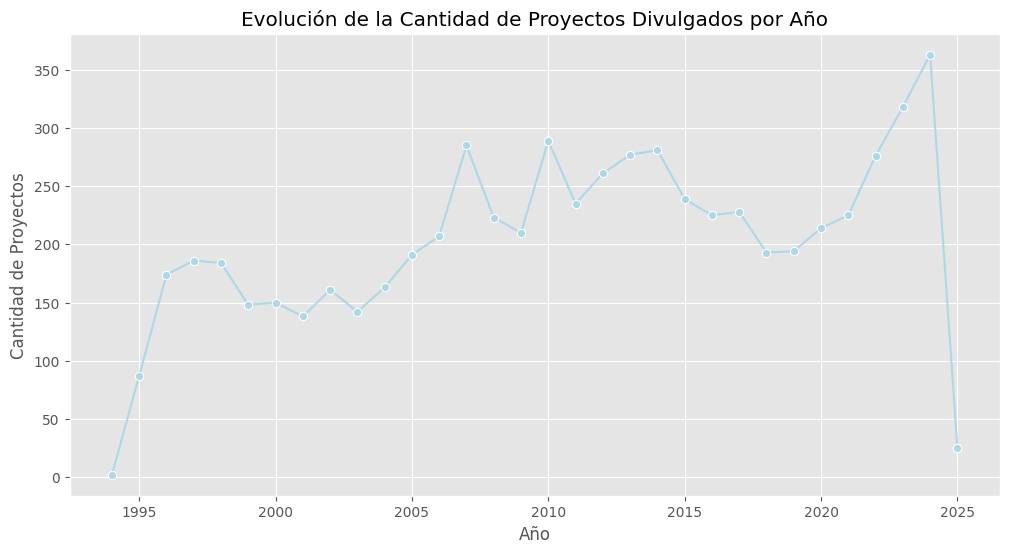

In [149]:
datos_limpios["fecha_divulgada"] = pd.to_datetime(datos_limpios["fecha_divulgada"], errors='coerce')
datos_limpios["anio_divulgacion"] = datos_limpios["fecha_divulgada"].dt.year
proyectos_por_anio = datos_limpios.groupby("anio_divulgacion").size().reset_index(name="cantidad_proyectos")

plt.figure(figsize=(12, 6))
sns.lineplot(data=proyectos_por_anio, x="anio_divulgacion", y="cantidad_proyectos", marker="o", color="lightblue")
plt.title("Evolución de la Cantidad de Proyectos Divulgados por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Proyectos")
plt.show()


*El gráfico muestra la evolución del número de proyectos divulgados por año, reflejando una tendencia general de crecimiento con fluctuaciones. Se observa un rápido aumento a finales de los años 90, seguido de variaciones entre 2000 y 2020. En los últimos años, hubo un fuerte incremento, alcanzando un pico reciente, pero con una caída abrupta en el último dato disponible. Esto podría indicar un cambio en las políticas de divulgación o una variación excepcional en la cantidad de proyectos aprobados.*

### 2.4. Cantidad de proyectos aprobados por año



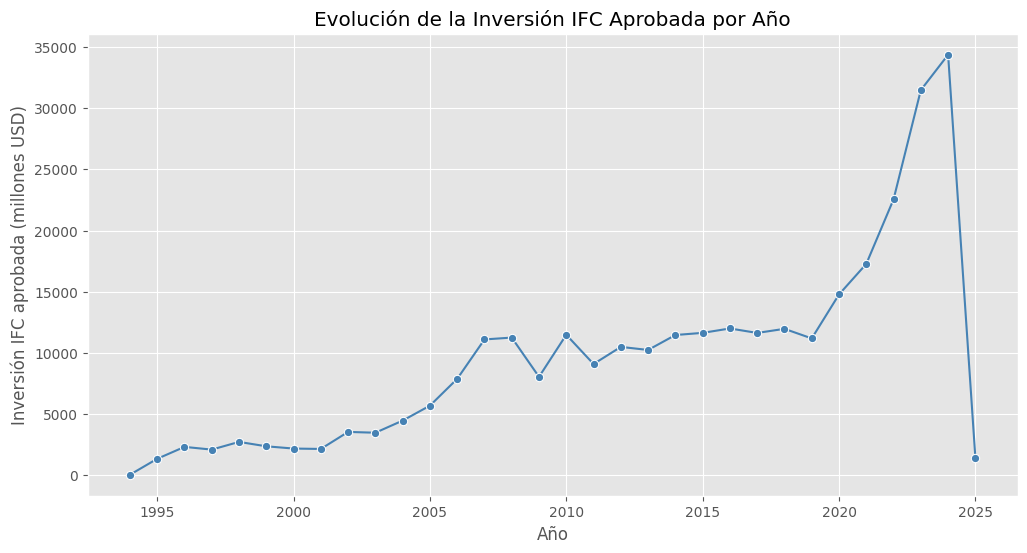

In [150]:
inversion_por_anio = datos_limpios.groupby("anio_divulgacion")["total_inversion_ifc_aprobada_junta_millones_usd"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=inversion_por_anio, x="anio_divulgacion", y="total_inversion_ifc_aprobada_junta_millones_usd", marker="o", color="steelblue")
plt.title("Evolución de la Inversión IFC Aprobada por Año")
plt.xlabel("Año")
plt.ylabel("Inversión IFC aprobada (millones USD)")
plt.show()


*El gráfico muestra la cantidad de proyectos aprobados por Año, se puede notar que entre 2020 y 2025 se presentó un pico, es decir, durante ese tiempo se aprobaron la mayor cantidad de proyectos.*





## 3. Análisis Multivariado

### 3.1. Relación entre Inversión, Categoría Ambiental y Región

*Este análisis examina cómo varía la inversión aprobada según la categoría ambiental y la región del proyecto.*



    categoria_ambiental                      pais  inversion_media  \
0                     A             Africa Region        89.166667   
1                     A                   Albania        45.866667   
2                     A                 Argentina        51.470000   
3                     A                   Armenia        65.000000   
4                     A                Azerbaijan        21.415000   
..                  ...                       ...              ...   
717                FI-3        Yemen, Republic of       500.000000   
718                FI-3                    Zambia        15.380000   
719               Other                     China        40.000000   
720               Other  Eastern Europe Subregion         0.000000   
721               Other                   Romania         8.290000   

     inversion_mediana  inversion_maxima  inversion_minima  
0               45.000            230.00             10.00  
1               46.060             58

C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\2229190644.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Figure size 1200x800 with 0 Axes>

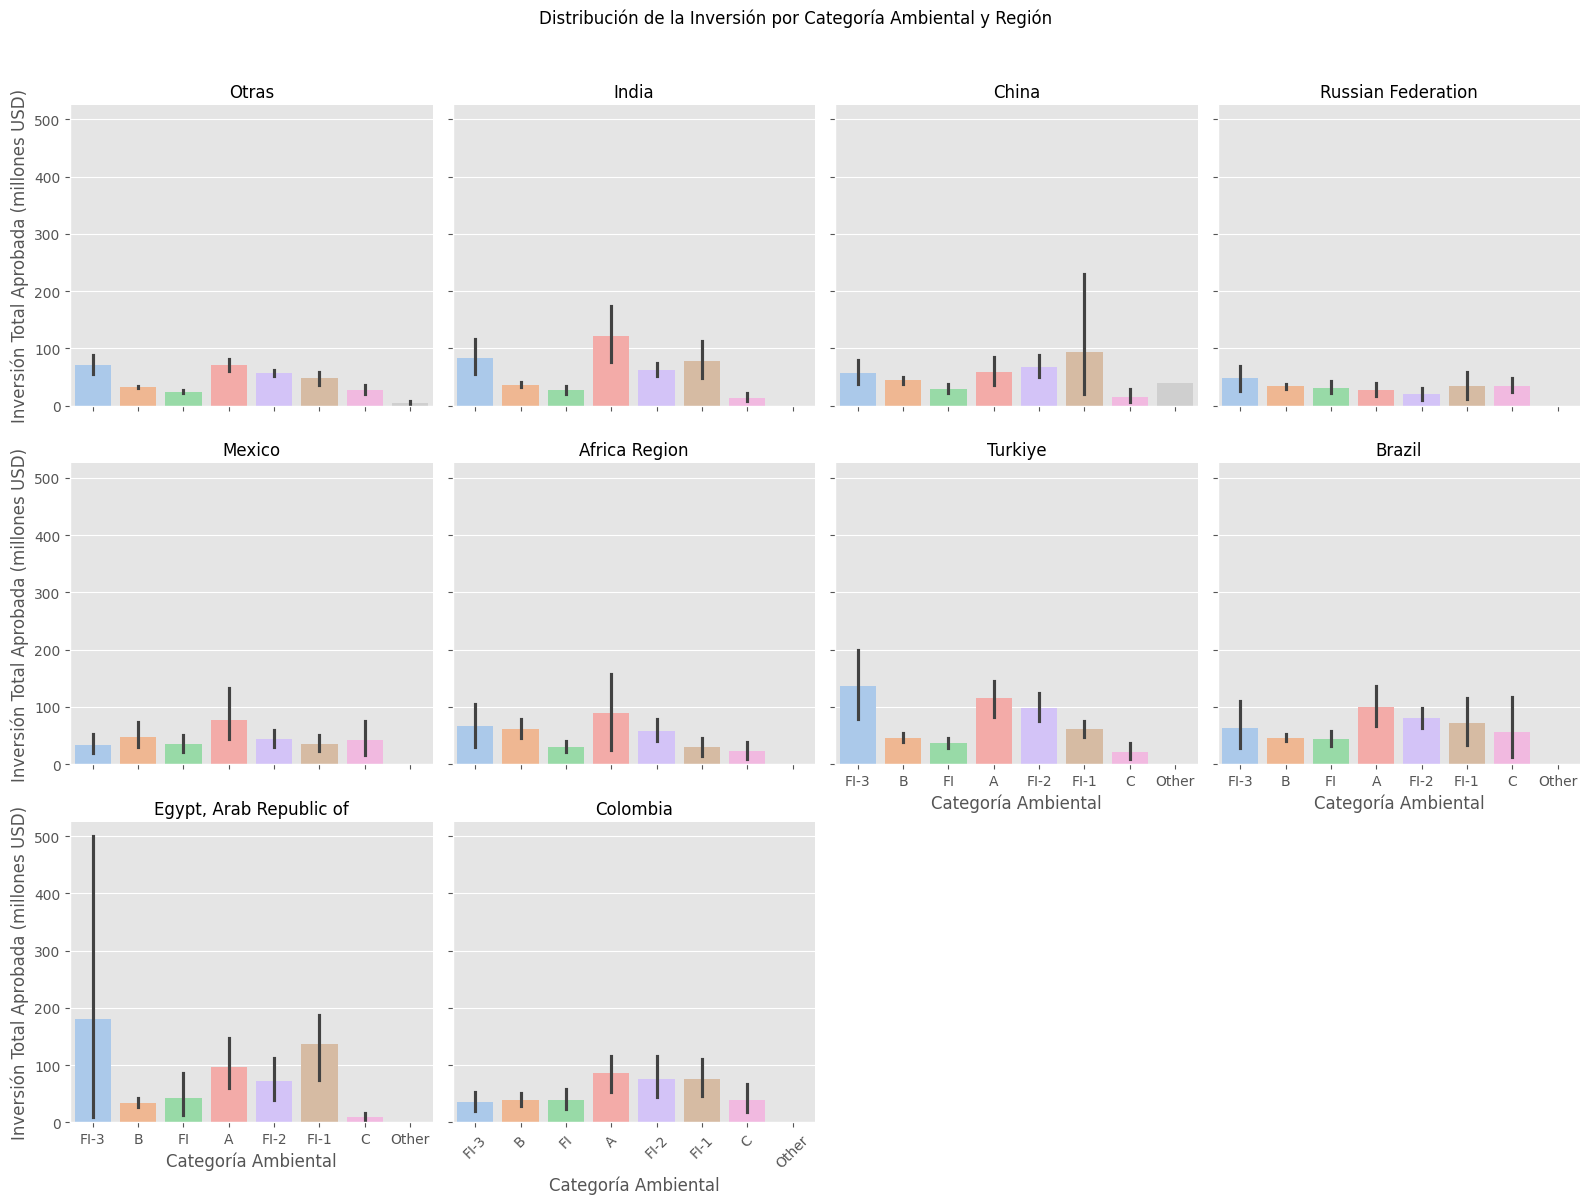

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar y calcular estadísticas
inversion_por_categoria_region = datos_limpios.groupby(['categoria_ambiental', 'pais'])[
    'total_inversion_ifc_aprobada_junta_millones_usd'
].agg(
    inversion_media=('mean'),
    inversion_mediana=('median'),
    inversion_maxima=('max'),
    inversion_minima=('min')
).reset_index()

print(inversion_por_categoria_region)

# Seleccionar las 10 regiones con más ocurrencias
top_regiones = datos_limpios['pais'].value_counts().nlargest(10).index.tolist()

datos_limpios['region_simplificada'] = datos_limpios['pais'].apply(
    lambda x: x if x in top_regiones else 'Otras'
)

# Filtrar y reemplazar nombres
datos_filtrados = datos_limpios[datos_limpios['region_simplificada'] != 'World Region'].copy()
datos_filtrados.replace({"pais": {
    "Egypt, Arab Republican of": "Egypt",
    "Russian Federation": "Russia"
}}, inplace=True)

# Crear gráfico con facetado por región
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=datos_filtrados,
    x="categoria_ambiental",
    y="total_inversion_ifc_aprobada_junta_millones_usd",
    col="region_simplificada",
    col_wrap=4,
    kind="bar",
    palette="pastel",
    height=4, aspect=1
)
g.set_axis_labels("Categoría Ambiental", "Inversión Total Aprobada (millones USD)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de la Inversión por Categoría Ambiental y Región")
plt.xticks(rotation=45)
plt.show()


*El gráfico muestra la distribución de la inversión total aprobada en millones de USD por categoría ambiental y región. Se destacan algunas diferencias clave entre regiones, con México y "Otras regiones" mostrando los valores de inversión más altos, particularmente en la categoría B. En países como India y China, las inversiones están más distribuidas, con la categoría FI-2 destacando. Otros países, como Rusia y Turquía, presentan inversiones más concentradas en pocas categorías. Esto sugiere que la asignación de inversión varía según las estrategias ambientales y prioridades de cada región, posiblemente debido a políticas locales, necesidades específicas de desarrollo o acceso a financiamiento diferenciado.*

### 3.2. Relación entre Industria, Categoría ambiental y Monto de Inversión

*Se analiza cómo se distribuye la inversión entre distintas industrias y regiones.*

C:\Users\SAMUEL\AppData\Local\Temp\ipykernel_3760\954316166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



<Figure size 1200x800 with 0 Axes>

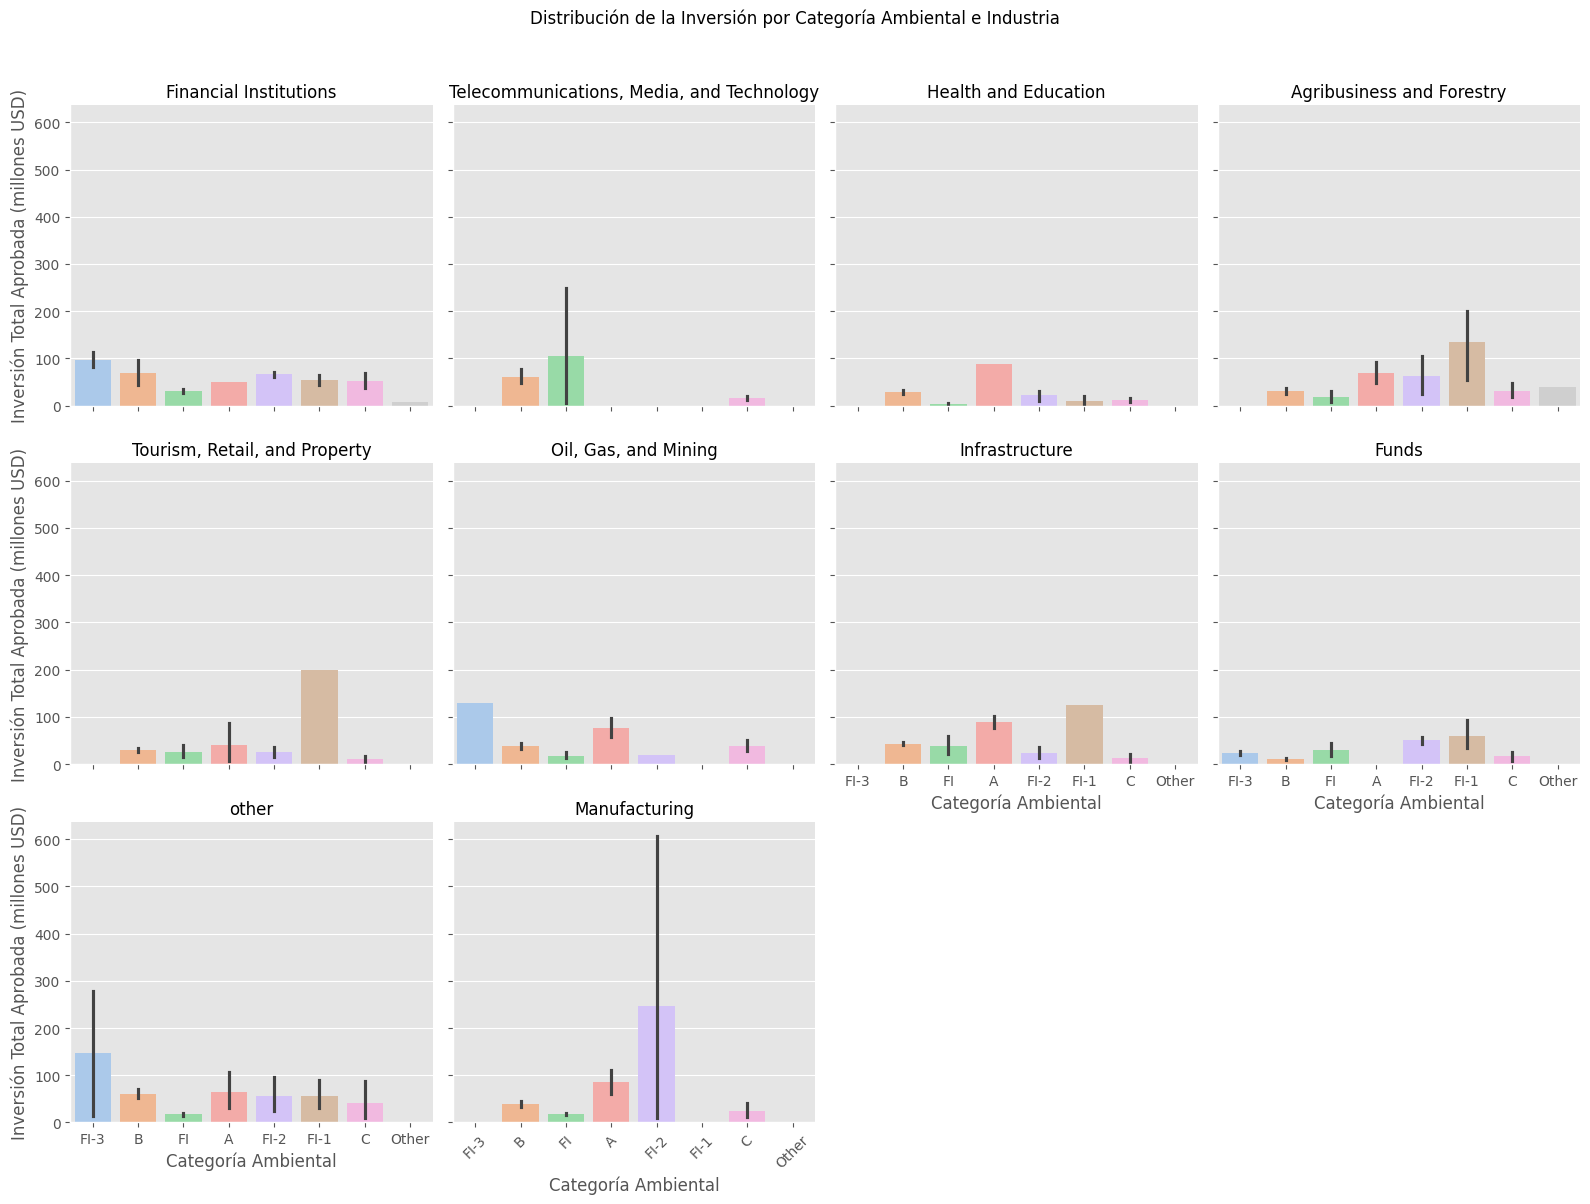

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.catplot(
    data=datos_limpios,
    x="categoria_ambiental",
    y="total_inversion_ifc_aprobada_junta_millones_usd",
    col="industria",
    col_wrap=4,
    kind="bar",
    palette="pastel",
    height=4, aspect=1
)
g.set_axis_labels("Categoría Ambiental", "Inversión Total Aprobada (millones USD)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución de la Inversión por Categoría Ambiental e Industria")
plt.xticks(rotation=45)
plt.show()


*El gráfico muestra la distribución de la inversión total aprobada en millones de USD por categoría ambiental e industria. Se observa que el sector Manufacturing y Business and Forestry reciben las mayores inversiones, especialmente en la categoría FI-2. En contraste, sectores como Health and Education y Funds tienen una distribución más equilibrada, con una fuerte presencia de la categoría B. Oil, Gas, and Mining muestra una inversión significativa en la categoría A, lo que podría estar relacionado con regulaciones ambientales más estrictas. Esto sugiere que la asignación de inversión varía según la naturaleza de la industria, posiblemente debido a factores como el impacto ambiental, regulaciones específicas y acceso a financiamiento especializado.*



### 3.3. Relación entre industria, region, y monto de inversión

    categoria_ambiental                      pais  inversion_media  \
0                     A             Africa Region        89.166667   
1                     A                   Albania        45.866667   
2                     A                 Argentina        51.470000   
3                     A                   Armenia        65.000000   
4                     A                Azerbaijan        21.415000   
..                  ...                       ...              ...   
717                FI-3        Yemen, Republic of       500.000000   
718                FI-3                    Zambia        15.380000   
719               Other                     China        40.000000   
720               Other  Eastern Europe Subregion         0.000000   
721               Other                   Romania         8.290000   

     inversion_mediana  inversion_maxima  inversion_minima  
0               45.000            230.00             10.00  
1               46.060             58

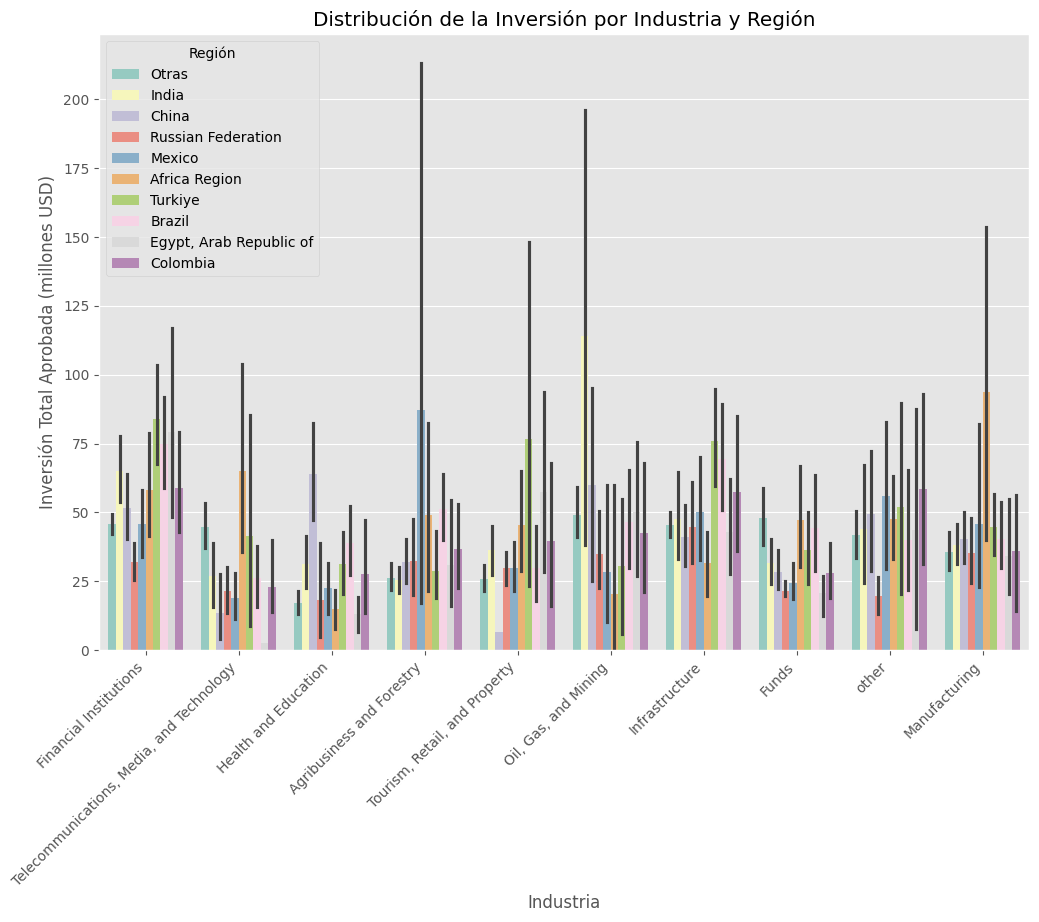

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar y calcular estadísticas
inversion_por_categoria_region = datos_limpios.groupby(['categoria_ambiental', 'pais'])[
    'total_inversion_ifc_aprobada_junta_millones_usd'
].agg(
    inversion_media=('mean'),
    inversion_mediana=('median'),
    inversion_maxima=('max'),
    inversion_minima=('min')
).reset_index()

print(inversion_por_categoria_region)

# Seleccionar las 10 regiones con más ocurrencias
top_regiones = datos_limpios['pais'].value_counts().nlargest(10).index.tolist()

datos_limpios['region_simplificada'] = datos_limpios['pais'].apply(
    lambda x: x if x in top_regiones else 'Otras'
)

# Filtrar y reemplazar nombres
datos_filtrados = datos_limpios[datos_limpios['region_simplificada'] != 'World Region'].copy()
datos_filtrados.replace({"pais": {
    "Egypt, Arab Republican of": "Egypt",
    "Russian Federation": "Russia"
}}, inplace=True)

# Crear gráfico de barras apiladas por industria y región
plt.figure(figsize=(12, 8))
g = sns.barplot(
    data=datos_filtrados,
    x="industria",
    y="total_inversion_ifc_aprobada_junta_millones_usd",
    hue="region_simplificada",
    palette="Set3"
)
plt.title("Distribución de la Inversión por Industria y Región")
plt.xlabel("Industria")
plt.ylabel("Inversión Total Aprobada (millones USD)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Región")
plt.show()


*El gráfico muestra la distribución de la inversión total aprobada en millones de USD por industria y región. Se observa que el sector Financial Institutions recibe la mayor inversión, destacando significativamente sobre las demás industrias. También se identifican picos importantes en Infrastructure y Manufacturing, lo que sugiere un enfoque en el desarrollo de estos sectores. La inversión está distribuida en múltiples regiones, con Otras regiones siendo la categoría predominante en la mayoría de las industrias. Esto podría indicar una estrategia global de financiamiento diversificado, con un énfasis en sectores clave para el crecimiento económico y el desarrollo estructural.*


### 3.4 Matriz de correlación entre inversiones


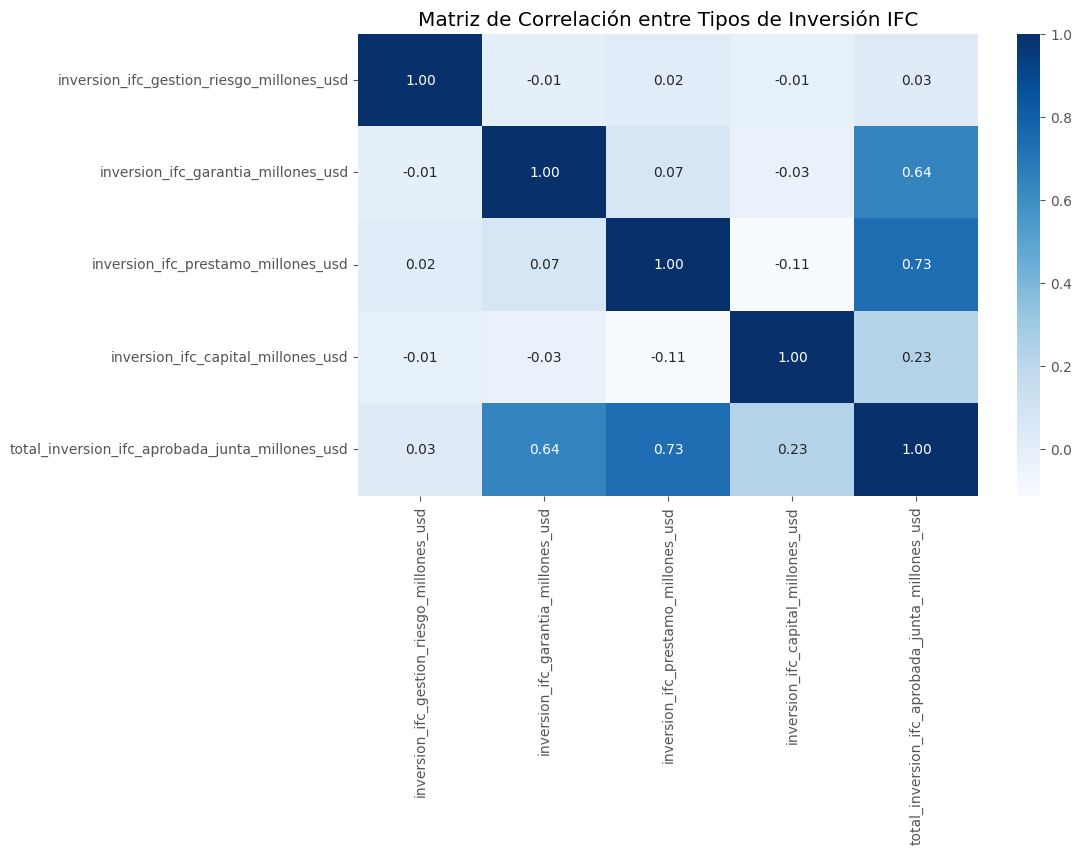

In [197]:
plt.figure(figsize=(10, 6))
sns.heatmap(datos_limpios[["inversion_ifc_gestion_riesgo_millones_usd", "inversion_ifc_garantia_millones_usd", "inversion_ifc_prestamo_millones_usd", "inversion_ifc_capital_millones_usd", "total_inversion_ifc_aprobada_junta_millones_usd"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación entre Tipos de Inversión IFC")
plt.show()